https://www.youtube.com/watch?v=t2ym2a3pb_Y

1. Inputs
2. Weights
3. w0 + x1 w1 +...+ xm wm = f
4. activation(f) = probability 

In [4]:
pip install keras

  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tensorflow

     |████████████████████████████████| 217.4 MB 2.1 kB/s  eta 0:00:01   |██▍                             | 15.9 MB 3.1 MB/s eta 0:01:06     |███████████▉                    | 80.6 MB 11.8 MB/s eta 0:00:12
     |████████████████████████████████| 5.8 MB 23.7 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 2.8 MB/s  eta 0:00:01
     |████████████████████████████████| 4.2 MB 38.2 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 41.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 21.3 MB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 34.5 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.1 MB/s  eta 0:00:01
     |████████████████████████████████| 960 kB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 

In [7]:
from keras.datasets import mnist

In [8]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [10]:
train_X[1].shape

(28, 28)

In [28]:
import matplotlib.pyplot as plt
import numpy as np

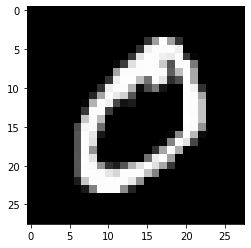

In [20]:
plt.imshow(train_X[1], cmap = 'gray')

In [21]:
train_X[0].flatten().shape

(784,)

### use only the first 20,000 training images
### only the first 2,000 testing images

In [48]:
X_train = []
for i in range(20000):
    array = list(train_X[i].flatten())
    array.insert(0,1)
    X_train.append(array)
    
X_train = np.array(X_train)

y_train = np.array(train_y[0:20000])

X_test = []
for j in range(2000):
    array = list((test_X[j].flatten()))
    array.insert(0,1)
    X_test.append(array)
X_test = np.array(X_test)

y_test = np.array(test_y[0:2000])

In [51]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

X_train shape (20000, 785)
X_test shape (2000, 785)


In [57]:
y_ = [1 if i == 0 else 0 for i in y_train]


# Perceptron Construct

unit step activation


w = w_old + a(yi-y_predi) xi

In [76]:
class Perceptron:
    
    def __init__(self, learning_rate = 0.01, n_iters = 1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
    
        
    def fit(self, X,y):
        n_samples, n_features = X.shape
        
        #init weights
        self.weights = np.zeros(n_features)
        
        y_ = [1 if i == 0 else 0 for i in y]
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights)
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y_[idx] - y_predicted) #gradient descent 
                self.weights += update *x_i
    
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights)
        y_predicted = self.activation_func(linear_output)
        
        return y_predicted
    
        
        
    def activation_func(self,x):
        
        return np.where(x>=0, 1, 0) 

In [82]:
p = Perceptron(learning_rate = 0.01, n_iters = 50)
p.fit(X_train, y_train)
predictions = p.predict(X_train)

accuracy = np.sum(y_t0 == predictions)/len(y_train)

In [83]:
accuracy

0.98965

In [69]:
y_t0 = [1 if i == 0 else 0 for i in y_train]

In [79]:
np.zeros(3)

array([0., 0., 0.])

In [163]:
class perceptron:
    def __init__(self, group, learning_rate = 0.01, n_iters = 10):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.group = group
        self.activation_func = self.stable_sigmoid
        self.weights = None

    def stable_sigmoid(self,x):

        sig = 1 / (1 + np.exp(-x))
    
        return np.where(sig>=0.5,1,0)

        
 

    def predict(self, X):
        linear_output = np.dot(X,self.weights)
        y_pred = self.activation_func(linear_output)
        #y_pred = np.where(y_pred>=0.5,1,0)

        return y_pred

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features) #guess a weight 
        y_ = [1 if i == self.group else 0 for i in y]
        for i in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights)
                y_predict = self.activation_func(linear_output)
                update = self.learning_rate * (y_[idx] - y_predict)
                self.weights = self.weights + (update * x_i)

In [145]:
linear_output = np.dot(X_train,0.5*np.ones(785))
z = 1/(1 + np.exp(-linear_output))
z

array([1., 1., 1., ..., 1., 1., 1.])

In [167]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [168]:
y_t0 = [1 if i == 0 else 0 for i in y_test]
p = perceptron(0, learning_rate = 0.01, n_iters = 10)
p.fit(X_train, y_train)
predictions_0 = p.predict(X_test)
sig0 = 1 / (1 + np.exp(-np.dot(X_test, p.weights)))
accuracy = np.sum(y_t0 == predictions_0)/len(y_test)
accuracy

0.985

In [166]:
sum(sig0 != 0)

165

In [169]:
y_t1 = [1 if i == 1 else 0 for i in y_test]
p = perceptron(1, learning_rate = 0.01, n_iters = 10)
p.fit(X_train, y_train)
predictions_1 = p.predict(X_test)
sig1 = 1 / (1 + np.exp(-np.dot(X_test, p.weights)))
accuracy = np.sum(y_t1 == predictions_1)/len(y_test)
accuracy

0.989

In [170]:
sum(sig1 != 0)

243

In [171]:
y_t2 = [1 if i == 2 else 0 for i in y_test]
p = perceptron(2, learning_rate = 0.01, n_iters = 10)
p.fit(X_train, y_train)
predictions_2 = p.predict(X_test)
sig2 = 1 / (1 + np.exp(-np.dot(X_test, p.weights)))
accuracy = np.sum(y_t2 == predictions_2)/len(y_test)
accuracy

0.963

In [173]:
sum(sig2 != 0)

181

In [174]:
y_t3 = [1 if i == 3 else 0 for i in y_test]
p = perceptron(3, learning_rate = 0.01, n_iters = 10)
p.fit(X_train, y_train)
predictions_3 = p.predict(X_test)
sig3 = 1 / (1 + np.exp(-np.dot(X_test, p.weights)))
accuracy = np.sum(y_t3 == predictions_3)/len(y_test)
accuracy

0.9525

In [175]:
sum(sig3 != 0)

135

In [176]:
y_t4 = [1 if i == 4 else 0 for i in y_test]
p = perceptron(4, learning_rate = 0.01, n_iters = 10)
p.fit(X_train, y_train)
predictions_4 = p.predict(X_test)
sig4 = 1 / (1 + np.exp(-np.dot(X_test, p.weights)))
accuracy = np.sum(y_t4 == predictions_4)/len(y_test)
accuracy

0.971

In [177]:
sum(sig4 != 0)

213

In [178]:
y_t5 = [1 if i == 5 else 0 for i in y_test]
p = perceptron(5, learning_rate = 0.01, n_iters = 10)
p.fit(X_train, y_train)
predictions_5 = p.predict(X_test)
sig5 = 1 / (1 + np.exp(-np.dot(X_test, p.weights)))
accuracy = np.sum(y_t5 == predictions_5)/len(y_test)
accuracy

0.94

In [179]:
sum(sig5 != 0)

252

In [180]:
y_t6 = [1 if i == 6 else 0 for i in y_test]
p = perceptron(6, learning_rate = 0.01, n_iters = 10)
p.fit(X_train, y_train)
predictions_6 = p.predict(X_test)
sig6 = 1 / (1 + np.exp(-np.dot(X_test, p.weights)))
accuracy = np.sum(y_t6 == predictions_6)/len(y_test)
accuracy

0.9765

In [181]:
sum(sig6 != 0)

172

In [182]:
y_t7 = [1 if i == 7 else 0 for i in y_test]
p = perceptron(7, learning_rate = 0.01, n_iters = 10)
p.fit(X_train, y_train)
predictions_7 = p.predict(X_test)
sig7 = 1 / (1 + np.exp(-np.dot(X_test, p.weights)))
accuracy = np.sum(y_t7 == predictions_7)/len(y_test)
accuracy

0.9645

In [183]:
y_t8 = [1 if i == 8 else 0 for i in y_test]
p = perceptron(8, learning_rate = 0.01, n_iters = 10)
p.fit(X_train, y_train)
predictions_8 = p.predict(X_test)
sig8 = 1 / (1 + np.exp(-np.dot(X_test, p.weights)))
accuracy = np.sum(y_t8 == predictions_8)/len(y_test)
accuracy

0.9155

In [184]:
y_t9 = [1 if i == 9 else 0 for i in y_test]
p = perceptron(9, learning_rate = 0.01, n_iters = 10)
p.fit(X_train, y_train)
predictions_9 = p.predict(X_test)
sig9 = 1 / (1 + np.exp(-np.dot(X_test, p.weights)))
accuracy = np.sum(y_t9 == predictions_9)/len(y_test)
accuracy

0.9375

In [185]:
import pandas as pd

In [186]:
d = {'col0': sig0, 'col1': sig1, 'col2': sig2, 'col3': sig3, 'col4': sig4, 'col5': sig5, 'col6': sig6, 'col7': sig7, 'col8': sig8,'col9': sig9}
>>> df = pd.DataFrame(data=d)

In [187]:
df

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [198]:
np.array(df.idxmax(axis=1)).shape

(2000,)

In [193]:
accuracy = (q2 == y_test)/len(y_test)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [194]:
q2.shape

(10,)

In [213]:
df2 = pd.DataFrame(np.array([sig0,sig1, sig2, sig3,sig4,sig5,sig6,sig7,sig8,sig9]))

In [215]:
q2 = np.array(df2.idxmax(axis=0))

In [216]:
accuracy = sum(q2 == y_test)/len(y_test)

In [217]:
accuracy

0.7795

In [209]:
y_test

array([7, 2, 1, ..., 3, 9, 5], dtype=uint8)

In [250]:
q2

array([7, 2, 1, ..., 3, 9, 5])

In [214]:
df2

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [218]:
sig_list = []  
acc_list = []
for c in range(10):
    y_t0 = [1 if i == c else 0 for i in y_test]
    p = perceptron(c, learning_rate = 0.01, n_iters = 10)
    p.fit(X_train, y_train)
    predictions_0 = p.predict(X_test)
    sig0 = 1 / (1 + np.exp(-np.dot(X_test, p.weights)))

    sig_list.append(sig0)
    accuracy = np.sum(y_t0 == predictions_0)/len(y_test)
    acc_list.append(accuracy)

In [221]:
len(sig_list[0])

2000

In [222]:
len(sig_list)

10

In [223]:
df3 = pd.DataFrame(sig_list)

In [224]:
df3

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [227]:
q3 = np.array(df3.idxmax(axis=0))

In [228]:


accuracy

0.7795

In [229]:
np.zeros(3)

array([0., 0., 0.])

# Logistic Regression

In [232]:
class LogisticRegression:
    
    def __init__(self, group, learning_rate = 0.01, n_iters = 10):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.group = group
        
        
    def fit(self, X, y):
        
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        y_ = [1 if i == self.group else 0 for i in y]
        for _ in range(self.n_iters):
            linear_output = np.dot(X, self.weights)
            y_predict = self.sigmoid(linear_output)
            update = np.dot(X.T,(y_predict - y_))
            self.weights = self.weights - self.learning_rate * (update)
        
    def predict(self, X):
        linear_output = np.dot(X, self.weights)
        y_prob = self.sigmoid(linear_output)
        y_predict = np.where(y_prob > 0.5, 1, 0)
        return y_predict
    
    def predict_prob(self,X):
        linear_output = np.dot(X, self.weights)
        y_prob = self.sigmoid(linear_output)
        return y_prob
        
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
        
  

In [237]:
y_t0 = [1 if i == 0 else 0 for i in y_test]
LR = LogisticRegression (0, learning_rate = 0.01, n_iters = 20)
LR.fit(X_train, y_train)
predictions_0 = LR.predict(X_test)

accuracy = np.sum(y_t0 == predictions_0)/len(y_test)
accuracy

0.981

In [238]:
prob_list_LR = []  
acc_list_LR = []
for c in range(10):
    y_t0 = [1 if i == c else 0 for i in y_test]
    LR = LogisticRegression(c, learning_rate = 0.01, n_iters = 10)
    LR.fit(X_train, y_train)
    
    predictions_0 = LR.predict(X_test)
    prob = LR.predict_prob(X_test)
    prob_list_LR.append(prob)
    
    accuracy = np.sum(y_t0 == predictions_0)/len(y_test)
    acc_list_LR.append(accuracy)

In [239]:
acc_list_LR

[0.9735, 0.9815, 0.9115, 0.8525, 0.9385, 0.95, 0.9625, 0.9615, 0.905, 0.903]

In [244]:
df4 = pd.DataFrame(prob_list_LR)
q4 = np.array(df4.idxmax(axis=0))
accuracy_LR = sum(q4 == y_test)/len(y_test)

In [245]:
accuracy

0.527

In [251]:
q4

array([7, 3, 1, ..., 3, 0, 3])

In [247]:
y_test

array([7, 2, 1, ..., 3, 9, 5], dtype=uint8)

In [248]:
df4

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
